In [22]:
import os
logdir = 'logs'
rundir = 'BreakoutNoFrameskip-v4|n_env=8|alg=a2c|n_timesteps=20000000'
logname = os.path.expanduser(os.path.join(logdir, rundir, 'log.log'))
assert os.path.isfile(logname)
logname

'logs/BreakoutNoFrameskip-v4|n_env=8|alg=a2c|n_timesteps=20000000/log.log'

In [23]:
with open(logname, 'r') as f:
    logstr = f.readlines()

In [24]:
import re
actor_loss = [s for s in logstr if s.startswith('|actor_loss')]
actor_loss = [float(re.findall(r'[-+]?\d*\.\d+|\d+', s)[0]) for s in actor_loss]

In [25]:
critic_loss = [s for s in logstr if s.startswith('|critic_loss')]
critic_loss = [float(re.findall(r'[-+]?\d*\.\d+|\d+', s)[0]) for s in critic_loss]

In [26]:
policy_entropy = [s for s in logstr if s.startswith('|policy_entropy')]
policy_entropy = [float(re.findall(r'[-+]?\d*\.\d+|\d+', s)[0]) for s in policy_entropy]

In [27]:
average_episode_reward = [s for s in logstr if s.startswith('|average_episode_reward')]
average_episode_reward = [float(re.findall(r'[-+]?\d*\.\d+|\d+', s)[0]) for s in average_episode_reward]

In [28]:
average_episode_length = [s for s in logstr if s.startswith('|average_episode_length')]
average_episode_length = [float(re.findall(r'[-+]?\d*\.\d+|\d+', s)[0]) for s in average_episode_length]

In [29]:
updates = [s for s in logstr if s.startswith('|update')]
updates = [int(re.findall(r'\d+', s)[0]) for s in updates]

Text(0.5, 1.0, 'Episode Length (Average)')

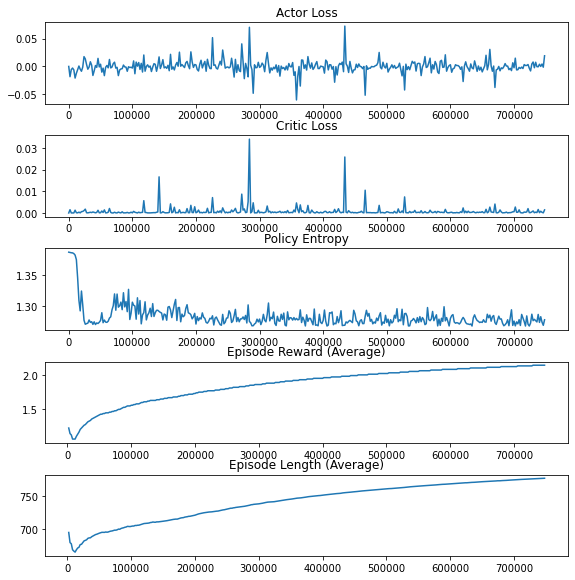

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5,1, figsize=(8,8))
fig.tight_layout()
ax[0].plot(updates, actor_loss)
ax[0].set_title('Actor Loss')
ax[1].plot(updates, critic_loss)
ax[1].set_title('Critic Loss')
ax[2].plot(updates, policy_entropy)
ax[2].set_title('Policy Entropy')
ax[3].plot(updates[1:], average_episode_reward)
ax[3].set_title('Episode Reward (Average)')
ax[4].plot(updates[1:], average_episode_length)
ax[4].set_title('Episode Length (Average)')